Это ноутбук, в котором собраны файлы для проекта по изучению литературного канона в Системном Блоке. Мы работали над материалом о том, как менялась школьная программа по литературе на протяжении советского и постсоветского периода. На основе анализа датасетов с программами за 1919-2022 мы хотим показать
а) в какие периоды и почему происходили существенные изменения; 
в) есть ли что-то общее в подходах к наполнению программы между сегодняшним днем и советским временем; 
в) существует ли то, что называется “литературным каноном” ― комплексом базовых произведений русской и зарубежной литературы, которые с точки зрения авторов программ обязательны для изучения.


Гипотеза 1. Существует набор произведений, изучение которых остается неизменным независимо от времени: они составляют более 50% произведений 90% программ.

Гипотеза 2. Содержание школьных программ подвергается трансформации в следующие моменты:  середина 1920-х (1924, 25 или 26-й годы); начало 1930-х (1932-33);  после войны — 1947 или 1948; начало оттепели — 1955 или 1956; начало 1970-х; перестройка (1986-87); 1991; конец 1990-х (1998 или 1999); 2003-2006, когда вводился ЕГЭ; 2015 г. после присоединения Крыма. 

Гипотеза 3. В содержании школьных программ отражаются культурные, политические, идеологические установки современности (не проверялась, на будущее).

Гипотеза 4. Процент зарубежной литературы в программе изменяется в разные года и может быть объяснен идеологическими установками времени (в 2014 и 2022 он будет меньше, чем до этого; в 1960, 1970, 1991 будет больше, чем до этого).

Гипотеза 5. (подпункт гипотез 2 или 3) Соотношение современной и классической литературы меняется и может быть объяснено идеологическими установками. Более 60% взвешенного авторского состава программ ― это представители русской классической литературы 1830-1890-х гг. В 2014, 2022 будет появляться больше произведений 19 века; в 1991 и начале 2000-х будет больше современных произведений. 

In [3]:
import pandas as pd
from difflib import SequenceMatcher
from itertools import combinations
from tqdm import tqdm_notebook
import numpy
import matplotlib.pyplot as plt
import math

Dataset cleaning

In [ ]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '344724416' #607689667 для листа с размеченной зарубежностью и веком, 344724416 для оригинального листа без нее
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_soviet = pd.read_csv(csv_url)
# df_soviet = df_soviet[df_soviet['priority'] != '*']
df_soviet

In [ ]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '1490854705' #1490854705 для общей программы;'727497467' для датасета где для 2007 и позже только ОГЭ-ЕГЭ, '836074625' для датасета, где только рабочие программы
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_contemporary = pd.read_csv(csv_url)
# df_contemporary = df_contemporary[df_contemporary['group'].isnull()]
# df_contemporary = df_contemporary[(df_contemporary['oblig_title'] != 'нет') | (df_contemporary['source_year'].isin([1998, 1999]))]
df_contemporary = df_contemporary.rename(columns={"source_year": "year"})
df_contemporary

In [ ]:
df_all = pd.concat([df_soviet, df_contemporary], ignore_index=True, sort=False)
df_all

In [ ]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
threshold = 0.75 
 
similar_authors = []

column1 = df_soviet['author'].dropna().unique()
column2 = df_contemporary['author'].dropna().unique()

for i in range(len(column1)):
    for j in range(len(column2)):  
        # print(df['author'][i], df['author'][j])
        if type(column1[i]) == str and type(column2[j]) == str: #to avoid error with comparing author to nan
            similarity = similar(column1[i], column2[j])
            if similarity > threshold and similarity < 1:
                similar_authors.append((column1[i], column2[j]))

similar_authors 
#этот код показал нескольких авторов, которые присутствовали в разных вариантах - например, Байрон Дж.Г. и Байрон Дж. Они были унифицированы

In [ ]:
similar_titles = []

column1 = df_soviet['title'].dropna().unique()
column2 = df_contemporary['title'].dropna().unique()

for i in range(len(column1)):
    for j in range(len(column2)):  
        if type(column1[i]) == str and type(column2[j]) == str: #to avoid error with comparing to nan
            similarity = similar(column1[i], column2[j])
            if similarity > threshold and similarity < 1:
                similar_titles.append((column1[i], column2[j]))

similar_titles, len(similar_titles) 
#этот код показал около сорока произведений, которые разнятся в двух датасетах (в основном стихотворения, названные по первой строке и басни типа Листы и корни - Листы и Корни). Они были заменены в советском датасете

In [ ]:
#теперь сравним советский и современный датасеты самих с собой, чтобы убедиться, что в них нет ошибок. этот код нашел несколько опечаток, они были заменены
similar_titles = []

column1 = df_soviet['title'].dropna().unique()

for i in range(len(column1)):
    for j in range(i+1, len(column1)):  
        if type(column1[i]) == str and type(column1[j]) == str: #to avoid error with comparing to nan
            similarity = similar(column1[i], column1[j])
            if similarity > threshold and similarity < 1:
                similar_titles.append((column1[i], column1[j]))

# print(similar_titles) 

# similar_titles = []

# column1 = df_contemporary['title'].dropna().unique()

# for i in range(len(column1)):
#     for j in range(i+1, len(column1)):  
#         if type(column1[i]) == str and type(column1[j]) == str: #to avoid error with comparing to nan
#             similarity = similar(column1[i], column1[j])
#             if similarity > threshold and similarity < 1:
#                 similar_titles.append((column1[i], column1[j]))

similar_titles

In [ ]:
similar_authors = []

column1 = df_soviet['author'].dropna().unique()

for i in range(len(column1)):
    for j in range(i+1, len(column1)):  
        if type(column1[i]) == str and type(column1[j]) == str: #to avoid error with comparing to nan
            similarity = similar(column1[i], column1[j])
            if similarity > threshold and similarity < 1:
                similar_authors.append((column1[i], column1[j]))

similar_authors, len(similar_authors) 

similar_authors = []

column1 = df_contemporary['author'].dropna().unique()

for i in range(len(column1)):
    for j in range(i+1, len(column1)):  
        if type(column1[i]) == str and type(column1[j]) == str: #to avoid error with comparing to nan
            similarity = similar(column1[i], column1[j])
            if similarity > threshold and similarity < 1:
                similar_authors.append((column1[i], column1[j]))

similar_authors, len(similar_authors) 

Hypothesis 1. Literary canon

Сначала посчитаем, сколько всего произведений встречаются в 90% программ или больше, чтобы понять общую картину. Здесь представлен расчет для общей программы, его можно заменить на современную или советскую, поменяв df_all на df_soviet или df_contemporary.

In [ ]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '344724416' #607689667 для листа с размеченной зарубежностью и веком, 344724416 для оригинального листа без нее
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_soviet = pd.read_csv(csv_url)
# df_soviet = df_soviet[df_soviet['priority'] != '*']

sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '1490854705' #1490854705 для общей программы;'727497467' для датасета где для 2007 и позже только ОГЭ-ЕГЭ, '836074625' для датасета, где только рабочие программы
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_contemporary = pd.read_csv(csv_url)
df_contemporary = df_contemporary[df_contemporary['group'].isnull()] #убрали необязательное
df_contemporary = df_contemporary[(df_contemporary['oblig_title'] != 'нет') | (df_contemporary['source_year'].isin([1998, 1999]))] #убрали необязательное кроме годов 98-99, где его очень много
df_contemporary = df_contemporary.rename(columns={"source_year": "year"})

df_all = pd.concat([df_soviet, df_contemporary], ignore_index=True, sort=False)
df_all

In [ ]:
all_titles = df_all[['author', 'title', 'year']].drop_duplicates().dropna(subset='author').dropna(subset='title') #['author', 'year']
all_titles

In [ ]:
grouped_by_year = all_titles.groupby(['year']).count()
grouped_by_year = grouped_by_year.sort_values(by=['author'], ascending=False)
grouped_by_year, grouped_by_year['author'].mean()

#каждый год у нас от 55 до 386 произведений, в среднем - 191 произведение

In [ ]:
grouped = all_titles.groupby(['author', 'title']).count() #(['author']).count()
grouped = grouped.sort_values(by=['year'], ascending=False)
grouped.head(16)
#посчитали, сколько раз встречается каждое произведение

In [ ]:
#unique_years = len(df_soviet['year'].unique())
unique_years = len(df_all['year'].drop_duplicates().dropna())
print(unique_years)
grouped['year'] = grouped['year'] / unique_years
grouped.head(22)

In [ ]:
(grouped['year'] >= 0.9).sum()

Итог: для современной программы 128 произведений встречаются в 90% программ или больше, для советской - 21, для обеих - 16. Исходя из этого кажется, что на современной программе гипотеза может выполниться, на других - точно нет. Сейчас проверим это строго.

Современная программа:

In [ ]:
years_contemporary = df_contemporary['year'].unique()
years_contemporary, len(years_contemporary)

In [ ]:
# percentage_by_year = []
for array in combinations(years_contemporary, 18):
    # print(array)
    # print(df_contemporary.head)
    df_years = df_contemporary[df_contemporary['year'].isin(array)]
    # print(df_years)
    all_titles_combination = df_years[['author', 'title', 'year']].drop_duplicates().dropna(subset='author').dropna(subset='title') 
    grouped = all_titles_combination.groupby(['author', 'title']).count() #(['author']).count()
    grouped = grouped.sort_values(by=['year'], ascending=False)
    percentage_for_each_year = []
    if len(grouped[grouped['year']==18]) == 128:
        grouped[grouped['year']==18].to_csv("canon_results_2.csv")
        for year in array:
            df_year = all_titles_combination[all_titles_combination['year']==year]
            percentage_for_each_year.append(128/len(df_year))
        print(percentage_for_each_year)

    #percentage_by_year.append(len(grouped[grouped['year']==18]))

# percentage_by_year.sort(reverse=True)
# percentage_by_year[:20]

Вывод: есть канон из 128 произведений, которые в 90% программ составляют не менее 46% каждой программы. При этом два года, не попавшие в эти 90% - это 1998 и 1999, потому что программы за них сильно отличаются и по тому, как организованы (что обязательно, что нет), и по смыслу. Также наш результат в 46% немного больше настоящего процента, поскольку мы не учитывали группы (набор произведений, из которых обязательно пройти только определенное количество).
Теперь посчитаем то же самое на советской программе.

In [ ]:
years_soviet = df_soviet['year'].unique()
years_soviet = years_soviet[:-1] #[:-1], поскольку в конце откуда-то появляется ненужный nan, даже хотя я до этого делала dropna
years_soviet, len(years_soviet), len(years_soviet)*0.9

Сейчас посмотрим на максимальное возможное значение, которое мы получим: это 47-42+1 = шестое (в идеальном случае пять самых маленьких мы можем отбросить) по порядку минимальное значение отношения 21 (максимальный возможный размер канона, как посчитано выше) к размеру программы    

In [ ]:
all_titles_soviet = df_soviet[['author', 'title', 'year']].drop_duplicates().dropna(subset='author').dropna(subset='title')
canon_to_all = []
for year in years_soviet:
    print(year)
    df_year = all_titles_soviet[all_titles_soviet['year']==year]
    canon_to_all.append((21/len(df_year)))

canon_to_all.sort()
canon_to_all[5], canon_to_all
    

Код ниже посчитал бы этот процент строго, но он очень долгий (6 часов), поэтому пока мы записали максимальный возможный процент: 8.7%

In [ ]:
percentage_by_year = []
for array in tqdm_notebook(combinations(years_soviet, 42), total =  1533939):
    # print(array)
    df_years = df_soviet[df_soviet['year'].isin(array)]
    #print(df_years)
    all_titles_combination = df_years[['author', 'title', 'year']].drop_duplicates().dropna(subset='author').dropna(subset='title') 
    grouped = all_titles_combination.groupby(['author', 'title']).count() #(['author']).count()
    grouped = grouped.sort_values(by=['year'], ascending=False)
    # print(len(grouped[grouped['year']==43]))
    percentage_for_each_year = []

    for year in array:
        df_year = all_titles_combination[all_titles_combination['year']==year]
        percentage_for_each_year.append(21/len(df_year))
    print(min(percentage_for_each_year))

    percentage_by_year.append((len(grouped[grouped['year']==43]), array))

percentage_by_year.sort(reverse=True)
percentage_by_year[:20]

In [ ]:
years_all = numpy.concatenate((years_soviet, years_contemporary), axis = 0)
years_all, len(years_all), len(years_all)*0.9

In [ ]:
all_titles_both = df_all[['author', 'title', 'year']].drop_duplicates().dropna(subset='author').dropna(subset='title')
canon_to_all = []
for year in years_all:
    print(year)
    df_year = all_titles_both[all_titles_both['year']==year]
    canon_to_all.append((16/len(df_year)))

canon_to_all.sort()
canon_to_all[7], canon_to_all

Вывод: максимальное возможное значение доли канона в 90% программ - 8.7% для советской программы, 6.6% для общей программы.

Гипотеза 2.
В этой гипотезе мы смотрели только на взвешенный авторский состав и не смотрели на произведения.

In [5]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '607689667' #607689667 для листа с размеченной зарубежностью и веком, 344724416 для оригинального листа без нее
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_soviet_hyp_2 = pd.read_csv(csv_url)
# df_soviet = df_soviet[df_soviet['priority'] != '*']
df_soviet_hyp_2 = df_soviet_hyp_2[df_soviet_hyp_2["type"] == "отечественная"]

sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '727497467' #1490854705 для общей программы;'727497467' для датасета где для 2007 и позже только ОГЭ-ЕГЭ, '836074625' для датасета, где только рабочие программы
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_contemporary_hyp_2 = pd.read_csv(csv_url)
# df_contemporary_hyp_2 = df_contemporary_hyp_2[df_contemporary_hyp_2['group'].isnull()] #убрали необязательное
# df_contemporary_hyp_2 = df_contemporary_hyp_2[(df_contemporary_hyp_2['oblig_title'] != 'нет') | (df_contemporary_hyp_2['source_year'].isin([1998, 1999]))] #убрали необязательное кроме годов 98-99, где его очень много
df_contemporary_hyp_2 = df_contemporary_hyp_2.rename(columns={"source_year": "year"})
df_contemporary_hyp_2.dropna(subset=['year'], inplace=True)
df_contemporary_hyp_2 = df_contemporary_hyp_2[df_contemporary_hyp_2["type"] == "отечественная"]

In [6]:
df_soviet_hyp_2.dropna(subset=['year'], inplace=True)
df_soviet_hyp_2['year'] = df_soviet_hyp_2['year'].astype(str)
df_soviet_hyp_2['year'] = df_soviet_hyp_2['year'].str.split('-').str[0]
df_soviet_hyp_2['year'] = df_soviet_hyp_2['year'].str.split('.').str[0]
df_soviet_hyp_2['year'] = df_soviet_hyp_2['year'].astype(int)
df_soviet_hyp_2

,author,title,comment,curriculum,id,year,grade,priority,type,century,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Пушкин А.С.,…Вновь я посетил…,NaN,39 ПСШ 8-10,9,1939,8,*,отечественная,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Крылов И.А.,Басни,NaN,19 ИРЛ 2 ст,1,1919,7,NaN,отечественная,18–19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Пушкин А.С.,…Вновь я посетил…,NaN,40 ПСШ 8-10,10,1940,8,*,отечественная,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Карамзин Н.М.,Бедная Лиза,NaN,19 ИРЛ 2 ст,1,1919,7,NaN,отечественная,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Островский А.Н.,Бедность не порок,NaN,19 ИРЛ 2 ст,1,1919,8,NaN,отечественная,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,Чичибабин Б.А.,NaN,NaN,91 ПСОУЗ,50,1991,11,*,отечественная,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10168,Чухонцев О.Г.,NaN,NaN,91 ПСОУЗ,50,1991,11,*,отечественная,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10169,Шаламов В.Т.,NaN,NaN,91 ПСОУЗ,50,1991,11,*,отечественная,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10170,Шукшин В.М.,NaN,NaN,91 ПСОУЗ,50,1991,11,*,отечественная,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def move_older_year_to_contain_program(year, min_year, column1, unique_pairs_older, df_older, df_program): #чтобы откатить год обратно до того момента, когда были данные по программе
    while len(unique_pairs_older[column1]) == 0 and year > min_year: 
        year-=1
        df_older = df_program[((df_program['year']) == year)]
        unique_pairs_older = df_older[['author', 'title']].drop_duplicates().dropna(subset=column1)
    return unique_pairs_older

def count_coinciding(unique_pairs_newer, unique_pairs_older, column1, column2):
    count = 0
    for index1, row1 in unique_pairs_newer.iterrows():
        for index2, row2 in unique_pairs_older.iterrows(): 
            if row1[column1] == row2[column1] and type(row1[column1])==str:
                    count += 1
                    break
    return count


def save_result(total_entries_1, total_entries_2, coinciding_count, year):
    if total_entries_2 > 0 and total_entries_1 > 0: 
            percentage_coinciding = (coinciding_count / total_entries_2) * 100
            print(year + 1, "--", percentage_coinciding)
    elif total_entries_2 == 0:
            print(year + 1, "--", "no data")

In [8]:
def count_and_display_coinciding_for_df(min_year, max_year, df_program, column1, column2):
        # column1 = 'author'
        for year in range(min_year, max_year+1): 
                df_older = df_program[((df_program['year']) == year)] 
                df_newer = df_program[((df_program['year']) == year+1)]

                unique_pairs_older = df_older[['author', 'title']].drop_duplicates().dropna(subset=column1) #очень важно не забывать сделать dropna, иначе счёт не сходится
                unique_pairs_newer = df_newer[['author', 'title']].drop_duplicates().dropna(subset=column1) 
                unique_pairs_older = move_older_year_to_contain_program(year, min_year, column1, unique_pairs_older, df_older, df_program)

                total_entries_1 = len(unique_pairs_older[column1])
                total_entries_2 = len(unique_pairs_newer[column1])

                coinciding_count = count_coinciding(unique_pairs_newer, unique_pairs_older, column1, column2)
                save_result(total_entries_1, total_entries_2, coinciding_count, year)

In [ ]:
count_and_display_coinciding_for_df(1919, 1991, df_soviet_hyp_2, 'author', '')

In [ ]:
count_and_display_coinciding_for_df(1998, 2023, df_contemporary_hyp_2, 'author', '')

Теперь давайте посчитаем гипотезу 2.1: как меняются произведения в программе от года к году?

In [9]:
def count_coinciding(unique_pairs_newer, unique_pairs_older, column1, column2): #здесь сравниваем и автора, и название, чтобы "лирика" Пушкина не равнялась "лирике" Лермонтова
    count = 0
    not_found_last_year = [] #for debugging
    for index1, row1 in unique_pairs_newer.iterrows():
        f = 0
        for index2, row2 in unique_pairs_older.iterrows(): 
            if row1[column1] == row2[column1] and (row1[column2] == row2[column2] or (type(row1[column2])==float and type(row1[column2])==float)) and type(row1[column1])==str: #type==float - это на случай, когда вместо автора NA, типа слова о полку игореве, тк NA != NA 
                    count += 1
                    f = 1
                    break
        if f == 0:
             not_found_last_year.append((row1['title'], row1['author']))
    print("not found last year", not_found_last_year) #year
    return count


In [ ]:
count_and_display_coinciding_for_df(1919, 1991, df_soviet_hyp_2, 'title', 'author')

In [21]:
count_and_display_coinciding_for_df(2020, 2021, df_contemporary_hyp_2, 'title', 'author')

not found last year [('1 января 1965 года', 'Бродский И.А.'), ('Август', 'Пастернак Б.Л.'), ('Адище города', 'Маяковский В.В.'), ('Айя-София', 'Мандельштам О.Э.'), ('Аленушка', 'Бунин И.А.'), ('Андрей Рублев', 'Гумилев Н.С.'), ('Анна Снегина', 'Есенин С.А.'), ('Ассаргадон', 'Брюсов В.Я.'), ('Безглагольность', 'Бальмонт К.Д.'), ('Блажен незлобивый поэт…', 'Некрасов Н.А.'), ('Бобэоби пелись губы…', 'Хлебников В.'), ('Будем как солнце!..', 'Бальмонт К.Д.'), ('Быть знаменитым некрасиво…', 'Пастернак Б.Л.'), ('В деревне Бог живет не по углам…', 'Бродский И.А.'), ('В полном разгаре страда деревенская…', 'Некрасов Н.А.'), ('В тот день, когда окончилась война…', 'Твардовский А.Т.'), ('Вам!', 'Маяковский В.В.'), ('Весенние воды', 'Тютчев Ф.И.'), ('Ветер принес издалека…', 'Блок А.А.'), ('Вечер', 'Бунин И.А.'), ('Вечером', 'Ахматова А.А.'), ('Внимая ужасам войны…', 'Некрасов Н.А.'), ('Во весь голос', 'Маяковский В.В.'), ('Воротишься на родину. Ну что ж…', 'Бродский И.А.'), ('Все повторяю первый 

In [ ]:
df_contemporary_hyp_2[df_contemporary_hyp_2['year'].isin([1998, 1999])].groupby('author')['title'].count().sort_values(ascending=False).head(20)

Подробные выводы по гипотезе 2 можно посмотреть в документе. 

In [13]:
df_all_hyp_2 = pd.concat([df_soviet_hyp_2, df_contemporary_hyp_2], ignore_index=True, sort=False)
print(df_all_hyp_2.groupby(['author'])['title'].count().sort_values(ascending=False).head(50))
# print(df_contemporary_hyp_2.groupby(['author'])['title'].count().sort_values(ascending=False).head(50))

author
Пушкин А.С.             1940
Лермонтов М.Ю.          1093
Маяковский В.В.          780
Некрасов Н.А.            696
Горький М.               624
Есенин С.А.              528
Блок А.А.                508
Чехов А.П.               460
Толстой Л.Н.             355
Тютчев Ф.И.              330
Салтыков-Щедрин М.Е.     289
Фет А.А.                 277
Гоголь Н.В.              265
Пастернак Б.Л.           262
Ахматова А.А.            259
Тургенев И.С.            244
Твардовский А.Т.         216
Жуковский В.А.           190
Цветаева М.И.            175
Шолохов М.А.             175
Белинский В.Г.           174
Державин Г.Р.            154
Бунин И.А.               140
Островский А.Н.          135
Крылов И.А.              132
Гончаров И.А.            109
Рылеев К.Ф.              107
Мандельштам О.Э.          98
Фадеев А.А.               93
Фонвизин Д.И.             87
Достоевский Ф.М.          84
Грибоедов А.С.            80
Айтматов Ч.Т.             79
Брюсов В.Я.               79
Ломонос

<Axes: xlabel='year'>

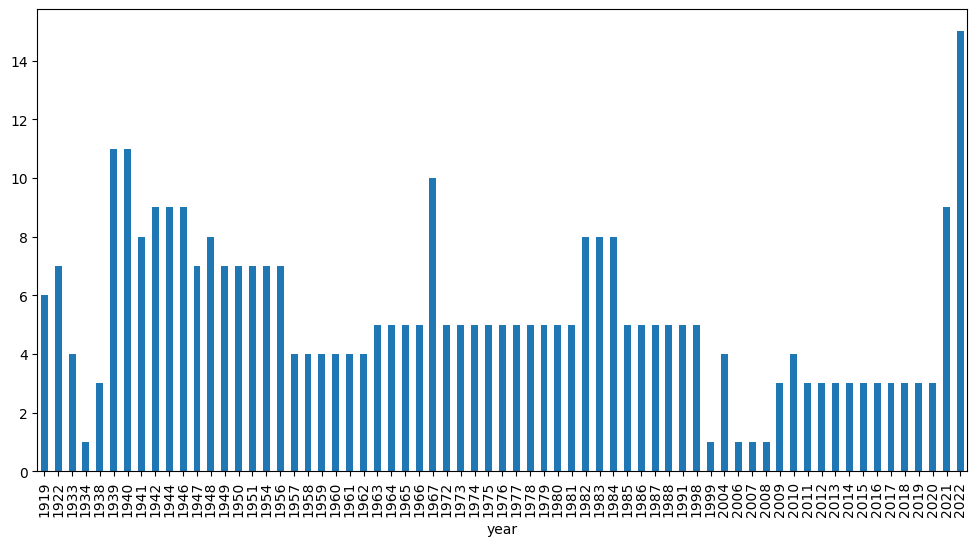

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
df_all_hyp_2[df_all_hyp_2['author']=="Толстой Л.Н."].groupby(['year'])['title'].count().plot(kind='bar')#.reset_index().head(50)

Гипотеза 4: зарубежность. 

In [ ]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '607689667' #лист, на котором мы разметили зарубежность и век
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_soviet_hyp_4 = pd.read_csv(csv_url)


In [ ]:
years_to_count_sov = []
foreign_sov = []
regional_sov = []
for year in range(1919,1992):
        df_year =  df_soviet_hyp_4[((df_soviet_hyp_4['year']) == year)]

        # Get unique pairs of values from columns A and B
        unique_pairs_year = df_year[['author', 'title', 'type']].drop_duplicates().dropna(subset=['type']) #непонятно, делать ли dropna, делать ли по конкретному столбцу...

        # print(unique_pairs_year)

        count_foreign = 0
        count_regional = 0
        for index1, row1 in unique_pairs_year.iterrows():
                if row1['type'] == "зарубежная":
                        count_foreign += 1
                elif row1['type'] == "региональная":
                        count_regional += 1

        if len(unique_pairs_year) > 0:
            years_to_count_sov.append(year)
            foreign_sov.append(round(count_foreign/len(unique_pairs_year) * 100, 3))
            regional_sov.append(round(count_regional/len(unique_pairs_year) * 100, 3))        
            print(year, round(count_foreign/len(unique_pairs_year) * 100, 3), round(count_regional/len(unique_pairs_year) * 100, 3))
        else:
            print(year, "-")


In [ ]:
years_to_count_sov, len(years_to_count_sov)

In [ ]:
plt.bar(years_to_count_sov, foreign_sov)
plt.show()

In [ ]:
plt.bar(years_to_count_sov, regional_sov)
plt.show()

Теперь разберемся с современным датасетом. Здесь сложнее считать, поскольку есть группы произведений, из которых нужно пройти только определенное количество.
number_authors — количество (от 1 до 3) авторов группы, произведения которых необходимо выбрать для изучения. Если в источнике оно неуказано, используется значение «NA».
number_titles — количество (от 1 до 10) или диапазон (2-3) произведений по выбору, предназначенных для изучения.Если в источнике оно неуказано, используется значение «NA».

Принятые решения:
- Группу произведений считаем как number_titles (в случае, если там указан диапазон, берем нижнюю границу диапазона); 
если number_titles не указан -- считаем как number_authors; если не указан и он -- как 1 произведение
группу в принципе учитываем только если там указано "зарубежная" в type (таким образом те, где указано NA, посчитаны не будут, и мы потеряем часть зарубежных произведений --- ну, увы)

- Если автор обязательный, а произведения -- нет, при этом для произведений не указана никакая группа по выбору, то все необязательные произведения считаем как одно 
(если, например, у автора 3 обязательных произведения и 8 необязательных, он должен быть посчитан 3+1=4 раза)

- Если автор не обязательный и ни в какую группу не входит, его вообще не считаем
(ни среди процента зарубежных/региональных, ни среди общего количества, от которого считаем процент)


In [ ]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '836074625' #'1490854705' общая программа;'727497467' для датасета где только ОГЭ-ЕГЭ в года, когда они есть, '836074625' для датасета, где только рабочие программы
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_contemporary_hyp_4 = pd.read_csv(csv_url)
df_contemporary_hyp_4 = df_contemporary_hyp_4.rename(columns={"source_year": "year"})
#program_list = ['2009–ОГЭ', '2010–ОГЭ', '2011–ОГЭ', '2012–ОГЭ', '2013–ОГЭ', '2014–ОГЭ', '2015–ОГЭ', '2016–ОГЭ', '2017–ОГЭ', '2018–ОГЭ', '2019–ОГЭ', '2020–ОГЭ', '2021–ОГЭ', '2022–ОГЭ', '2023–ОГЭ']
#program_list = ['2007–ЕГЭ', '2008–ЕГЭ', '2009–ЕГЭ', '2010–ЕГЭ', '2011–ЕГЭ', '2012–ЕГЭ', '2013–ЕГЭ', '2014–ЕГЭ', '2015–ЕГЭ', '2016–ЕГЭ', '2017–ЕГЭ', '2018–ЕГЭ', '2019–ЕГЭ', '2020–ЕГЭ', '2021–ЕГЭ', '2022–ЕГЭ', '2023–ЕГЭ']
df_contemporary_hyp_4 = df_contemporary_hyp_4[df_contemporary_hyp_4['profound'] != 'да']
#df_contemporary_hyp_4 = df_contemporary_hyp_4[df_contemporary_hyp_4['source_id'].isin(program_list)]
df_contemporary_hyp_4

In [ ]:
def extract_start_of_range(value):
    # print(value)
    if isinstance(value, (int, str)):
        if '-' in value:
            return int(value.split('-')[0])
        if '–' in value:
             return int(value.split('–')[0])
        else:
            return int(value)
    else:  #для значений NA
         return value

In [ ]:
years_to_count_cont = []
foreign_cont = []
regional_cont = []
for year in range(1998, 2024):
        df_year =  df_contemporary_hyp_4[((df_contemporary_hyp_4['year']) == year)]

        # print(df_year)
        #смотрим на часть с группами
        df_year_groups = df_year[df_year['group'].notna()].copy().drop_duplicates('group') #оставили каждую группу один раз

        # print(df_year_groups['group'].value_counts())

        df_year_groups['number_titles'] = df_year_groups['number_titles'].apply(lambda x: extract_start_of_range(x)) #привели значения типа 3-4 к номерам типа 3

        # print(df_year_groups)

        count_foreign = 0
        count_regional = 0
        count_all = 0 #чтобы потом нормально посчитать процент зарубежных и региональных, с учетом обязательности - необязательности 
        
        for index1, row1 in df_year_groups.iterrows():
                to_add = 0
                if not math.isnan(row1['number_titles']):
                    to_add += row1['number_titles']
                elif not math.isnan(row1['number_authors']):
                    to_add += row1['number_authors']
                else:
                    to_add += 1

                count_all += to_add
                if row1['type'] == "зарубежная":
                    count_foreign += to_add
                elif row1['type'] == "региональная":
                    count_regional += to_add

        # print("counts", count_foreign, count_regional, count_all)

        #смотрим на часть без групп
        df_year_not_groups = df_year[df_year['group'].isna()].copy()

        # print(df_year_not_groups)

        authors_to_add_foreign = set() #добавим сюда всех авторов, у которых произведения не обязательны для прохождения
        authors_to_add_regional = set()
        authors_to_add_all = set()
        for index1, row1 in df_year_not_groups.iterrows():
                if row1["oblig_author"] == "да":
                    if row1["oblig_title"] == "да":
                        count_all += 1
                        # print("added one")
                        if row1['type'] == "зарубежная":
                            count_foreign += 1
                        elif row1['type'] == "региональная":
                              count_regional += 1

                    else:
                        authors_to_add_all.add(row1["author"])
                        if row1['type'] == "зарубежная":
                            authors_to_add_foreign.add(row1["author"])
                        elif row1['type'] == "региональная":
                             authors_to_add_regional.add(row1["author"])    
                
        count_foreign += len(authors_to_add_foreign)
        count_regional += len(authors_to_add_regional)
        count_all += len(authors_to_add_all)

        # print("counts", count_all, count_foreign, count_regional)

        if len(df_year) > 0:        
            years_to_count_cont.append(year)
            foreign_cont.append(round(count_foreign/count_all * 100, 3))
            regional_cont.append(round(count_regional/count_all * 100, 3))
            print(year, "   ", round(count_foreign/count_all * 100, 3), "", "   ", round(count_regional/count_all * 100, 3))
        else:
            print(year, " no data")


In [ ]:
years_to_count_cont, len(years_to_count_cont)

In [ ]:
plt.bar(years_to_count_cont, foreign_cont)
plt.show()

In [ ]:
years_to_count_sov.extend(years_to_count_cont)
foreign_sov.extend(foreign_cont)
regional_sov.extend(regional_cont)
plt.bar(years_to_count_sov, foreign_sov)
plt.show()

Теперь попробуем посчитать для современного датасета без всех этих принятых решений, просто каждое произведение считаем один раз, вне зависимости от обязательности

In [ ]:
for year in range(1998,2023):
        df_year =  df_contemporary_hyp_4[((df_contemporary_hyp_4['year']) == year)]

        # Get unique pairs of values from columns A and B
        unique_pairs_year = df_year[['author', 'title', 'type']].drop_duplicates().dropna(subset=['type']) #непонятно, делать ли dropna, делать ли по конкретному столбцу...

        # print(unique_pairs_year)

        count_foreign = 0
        count_regional = 0
        for index1, row1 in unique_pairs_year.iterrows():
                if row1['type'] == "зарубежная":
                        count_foreign += 1
                elif row1['type'] == "региональная":
                        count_regional += 1

        if len(unique_pairs_year) > 0:
            years_to_count_sov.append(year)
            foreign_sov.append(round(count_foreign/len(unique_pairs_year) * 100, 3))
            regional_sov.append(round(count_regional/len(unique_pairs_year) * 100, 3))        
            print(year, round(count_foreign/len(unique_pairs_year) * 100, 3), round(count_regional/len(unique_pairs_year) * 100, 3))
        else:
            print(year, "-")

Выброс 2004 года объясняется тем, что в этом году отдельно прописана ещё программа для углубленного изучения литературы. Интересно, что и региональной, и зарубежной литературы стало больше в 2021-22.


Теперь рассмотрим гипотезу 5. 

In [101]:
sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '607689667' #607689667 для листа с размеченной зарубежностью и веком, 344724416 для оригинального листа без нее
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_soviet_hyp_5 = pd.read_csv(csv_url)
# df_soviet = df_soviet[df_soviet['priority'] != '*']

sheet_id = '1GwpzLCLKDT3jpnRq4no2VRBeMN8EHHpWfqXiR2qJHv0'
gid = '727497467' #1490854705 для общей программы;'727497467' для датасета где для 2007 и позже только ОГЭ-ЕГЭ, '836074625' для датасета, где только рабочие программы
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}'
df_contemporary_hyp_5 = pd.read_csv(csv_url)
# df_contemporary_hyp_5 = df_contemporary_hyp_5[df_contemporary_hyp_5['group'].isnull()] #убрали необязательное
# df_contemporary_hyp_5 = df_contemporary_hyp_5[(df_contemporary_hyp_5['oblig_title'] != 'нет') | (df_contemporary_hyp_5['source_year'].isin([1998, 1999]))] #убрали необязательное кроме годов 98-99, где его очень много
df_contemporary_hyp_5 = df_contemporary_hyp_5.rename(columns={"source_year": "year"})
df_contemporary_hyp_5 = df_contemporary_hyp_5[df_contemporary_hyp_5['type'] == 'отечественная']

df_soviet_hyp_5.dropna(subset=['year'], inplace=True)
df_soviet_hyp_5['year'] = df_soviet_hyp_5['year'].astype(str)
df_soviet_hyp_5['year'] = df_soviet_hyp_5['year'].str.split('-').str[0]
df_soviet_hyp_5['year'] = df_soviet_hyp_5['year'].str.split('.').str[0]
df_soviet_hyp_5['year'] = df_soviet_hyp_5['year'].astype(int)
df_soviet_hyp_5 = df_soviet_hyp_5[df_soviet_hyp_5['type'] == 'отечественная']
# df_soviet_hyp_5

In [113]:
def count_centuries(unique_pairs_year, centuries_this_year, centuries):
     for index1, row1 in unique_pairs_year.iterrows():
            if row1['century'] in ['19', '20', '18']:
                centuries_this_year[row1['century']] += 1
            centuries[row1['century']] += 1 

def count_percents_and_print_centuries_this_year(year, centuries_this_year):
     if centuries_this_year != {'20': 0, '19': 0, '18': 0}:
            total_this_year = sum(centuries_this_year.values())
            for key in centuries_this_year:
                centuries_this_year[key] /= (total_this_year/100)
                centuries_this_year[key] = (round(centuries_this_year[key], 3))
     print(year, centuries_this_year)


def count_percents_and_print_centuries(centuries):
    total = sum(centuries.values())
    # print(total)
    for key in centuries:
        centuries[key]/= (total/100)
        centuries[key] = (round(centuries[key], 3))
    centuries = sorted(centuries.items(), key=lambda x:x[1], reverse=True)
    print(centuries)


        

In [114]:
def count_and_display_centuries_for_df(min_year, max_year, df_program):
        centuries = {"–5":0, "11": 0, "12": 0, "13": 0, "14": 0, "15":0, "16":0, "17":0, "18":0, "19":0, "20":0, "21":0, "9–8":0, "8–7":0, "8–10":0, "7–5":0, "11–12":0, "11–14":0, "11–17":0, "12–13":0, "13–16":0, "15–16":0, "16–17":0, "17–18":0, "18–19":0, "19–20":0, "20–21":0}#
        for year in range(min_year, max_year+1): 
                df_year = df_program[((df_program['year']) == year)] 
                centuries_this_year = {'20':0,'19':0,'18':0}
                unique_pairs_year = df_year[['author', 'title', 'century']].drop_duplicates().dropna(subset='century') #очень важно не забывать сделать dropna, иначе счёт не сходится
                count_centuries(unique_pairs_year, centuries_this_year, centuries)
                count_percents_and_print_centuries_this_year(year, centuries_this_year)

        count_percents_and_print_centuries(centuries)

In [ ]:
count_and_display_centuries_for_df(1919,1992,df_soviet_hyp_5)

In [ ]:
count_and_display_centuries_for_df(1998,2023,df_contemporary_hyp_5)

Вывод: мы видим, что 20 и 19 века примерно поровну, а в современной программе 20 века даже больше.